In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = load_breast_cancer()

In [3]:
x= data.data
y = data.target

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
s = StandardScaler()
X_std = s.fit_transform(x)

### PCA (principle component analysis)
This gets the lrgest k components that catch the greatest variance in the data

In [6]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance = None

    def fit(self, x):
        self.mean = np.mean(x, axis=0)
        x = x - self.mean
        covariance_matrix = np.cov(x.T)
        # eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        # sort according to eigen values
        eigenvectors = eigenvectors . T
        order_of_importance = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[order_of_importance]
        sorted_eigenvectors = eigenvectors[order_of_importance]

        # Select the top k components
        top_eig_vectors = sorted_eigenvectors[0 :self.n_components]
        top_eig_values = sorted_eigenvalues[0:self.n_components]
        self.explained_variance = top_eig_values / np.sum(eigenvalues)
        self.components = top_eig_vectors

    def transform(self, x):
        x = x - self.mean
        return np.dot(x, self.components.T)


In [7]:
class KMeans:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.clusters = [[] for _ in range(self.k)]
        self.centroids = []

    def fit(self, x):
      self.x = x
      self.n_samples, self.n_features = x.shape

      # Initialize centroids
      random_sample_idx = np.random.choice(self.n_samples, self.k, replace=False)
      self.centroids = [self.x[idx] for idx in random_sample_idx]

      for _ in range(self.max_iters):
          # Update clusters and centroids
          clusters = [[] for _ in range(self.k)]  # Initialize clusters in each iteration
          centroids_old = np.copy(self.centroids)  # Store the old centroids
          self.centroids = np.zeros((self.k, self.n_features))
          for idx, sample in enumerate(self.x):
              # Find the closest centroid
              distances = [np.sqrt(np.sum((sample - point) ** 2)) for point in centroids_old]
              closest_idx = np.argmin(distances)
              clusters[closest_idx].append(idx)

              # Update centroids on the fly
              self.centroids[closest_idx] += sample

          # Normalize centroids by the number of points in each cluster
          for idx, cluster in enumerate(clusters):
              if len(cluster) > 0:
                  self.centroids[idx] /= len(cluster)
              else:
                  random_idx = np.random.choice(self.n_samples)
                  self.centroids[idx] = self.x[random_idx]

          # Check convergence
          distances = [np.sqrt(np.sum((centroids_old[i] - self.centroids[i]) ** 2)) for i in range(self.k)]
          if sum(distances) == 0:
              break

          # Update self.clusters for SSE calculation
          self.clusters = clusters

      # Get cluster labels
      labels = np.empty(self.n_samples)
      for cluster_idx, cluster in enumerate(clusters):
          for sample_idx in cluster:
              labels[sample_idx] = cluster_idx

      return labels


    def compute_sse(self):
        sse = 0
        for idx, cluster in enumerate(self.clusters):
            centroid = self.centroids[idx]
            for sample_idx in cluster:
                sample = self.x[sample_idx]
                sse += np.sqrt(np.sum((sample - centroid) ** 2)) ** 2
        return sse


In [8]:
x.shape

(569, 30)

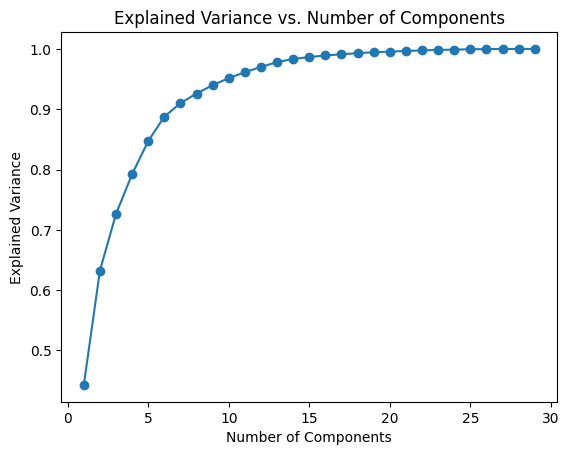

In [9]:
comp_range = range(1,30)

exp_vars = []
for n_comps in comp_range:
  pca = PCA(n_comps);
  pca.fit(X_std)
  exp_vars.append(np.sum(pca.explained_variance))

plt.plot(comp_range, exp_vars, marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()


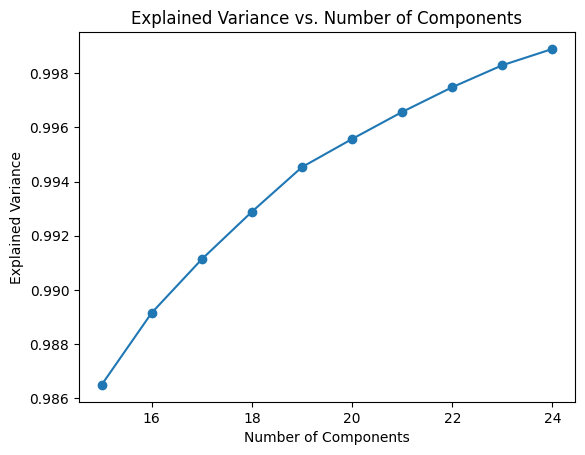

In [10]:
comp_range = range(15,25)

exp_vars = []
for n_comps in comp_range:
  pca = PCA(n_comps);
  pca.fit(X_std)
  exp_vars.append(np.sum(pca.explained_variance))

plt.plot(comp_range, exp_vars, marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()


We can see fromthe figure that about 18 components out of the 30 catch more than 99% of the variance

In [11]:
num_reduced_dim = 18

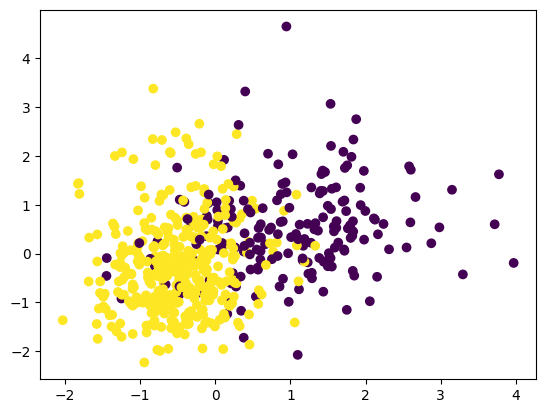

In [12]:
kmean = KMeans(k=2)
labels = kmean.fit(X_std)
plt.scatter(X_std[:, 0], X_std[:, 1], c=labels)
plt.show()

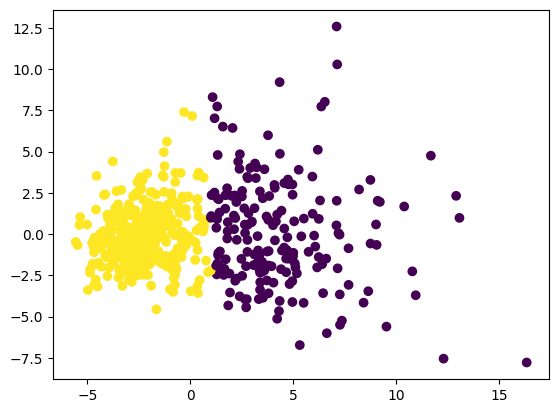

In [13]:
pcaFinal = PCA(n_components=18)
pcaFinal.fit(X_std)
X_pca = pcaFinal.transform(X_std)
kmean = KMeans(k=2)
labels = kmean.fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.show()

### Kmeans technique unsupervised learning

In [14]:
def elbow_method(X, max_k=10):
    distortions = []
    for k in range(1, max_k):
        km = KMeans(k=k, max_iters=300)
        km.fit(X)
        distortion = km.compute_sse()
        distortions.append(distortion)
        #print(f'k={k}, distortion={distortion}')
    return distortions

In [15]:
elbow_method(X_std)

[17069.999999999993,
 11595.683312822135,
 10065.441178732835,
 9349.377669743495,
 8651.889204378089,
 8129.9006821567755,
 7650.322151778584,
 7433.754774283908,
 6940.805178604135]

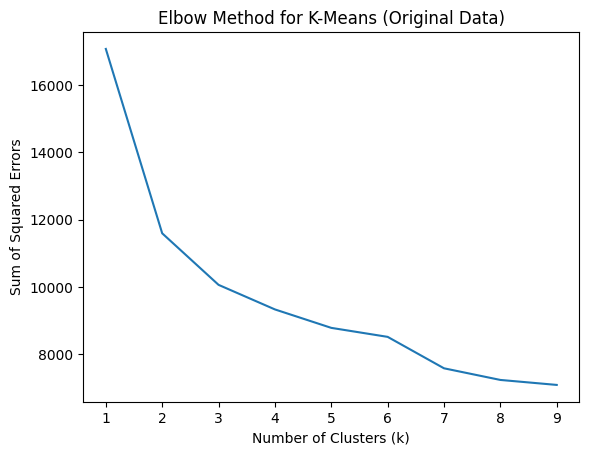

In [16]:

# First Experiment: Cluster the dataset using k-means
k_values = range(1, 10)
distortions = elbow_method(X_std, max_k=10)

plt.plot(k_values, distortions)
plt.title('Elbow Method for K-Means (Original Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.show()





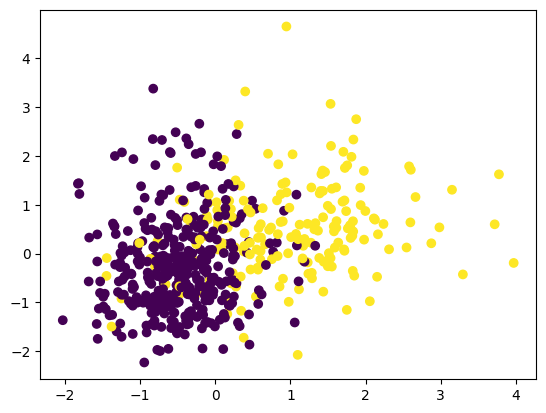

In [17]:
optimal_k = 2 # from the elbow plot
kmean = KMeans(k=optimal_k)
labels = kmean.fit(X_std)
plt.scatter(X_std[:, 0], X_std[:, 1], c=labels)
plt.show()

In [18]:
sse_original = kmean.compute_sse()

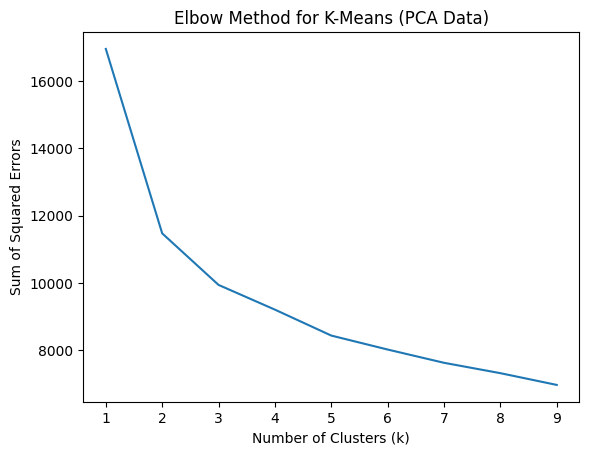

In [19]:
k_values = range(1, 10)
distortions = elbow_method(X_pca, max_k=10)

plt.plot(k_values, distortions)
plt.title('Elbow Method for K-Means (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.show()



In [28]:
optimal_k_pca = 3


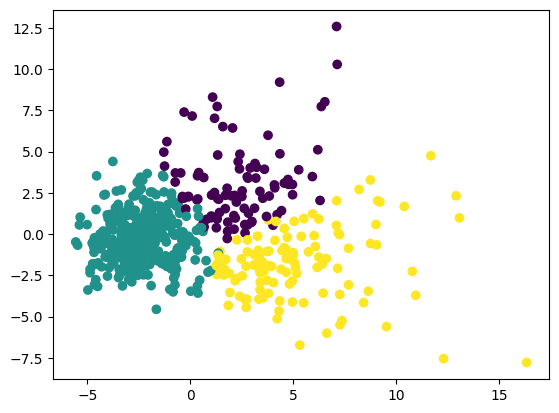

In [29]:
kmean2 = KMeans(k=optimal_k_pca )
labels = kmean2.fit(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1] , c=labels)
plt.show()

In [30]:
sse_pca = kmean2.compute_sse()

In [31]:
# Compare the sum of square errors/distances between experiments


print(f'Sum of Squared Errors (Original Data, k={optimal_k}): {sse_original}')
print(f'Sum of Squared Errors (PCA, {num_reduced_dim} components, k={optimal_k_pca}): {sse_pca}')


Sum of Squared Errors (Original Data, k=2): 11595.461473962361
Sum of Squared Errors (PCA, 18 components, k=3): 9944.43884079458


The lower SSE in the PCA case suggests that the dimensionality reduction using PCA has been effective in preserving the essential information for clustering while reducing noise.

The reduced-dimensional representation might have enhanced the separation between clusters, making it easier for the k-means algorithm to assign data points to more distinct clusters.